## Gauteng Housing Price Prediction Model


We chose the Gauteng Housing dataset collected by the Explore Data Science Academy the data comprises of  Johannesburg property prices, number of bathroom, bedroom, garages, property size in square meters (erf size), listing date and location. The goal of the model is to predict the property listing prices in JHB and the surrounding areas

### The Model Objective 

The machine learning will be used as input in a web application used to predict housing prices used by property developers and home owners looking into selling their propertiy or a new home owner looking looking to buy a property. 

### System  Assumptions 

- The downstream machine learning system will output continous values.
- The end customer will filter through the data attributes 
- Search filter based on the attributes  



### Loading the dataset 

The dataset is pre-split into training and testing data (*.csv)

In [1]:
import os 
import pandas as pd 
import numpy as np 

In [2]:
housing_training = pd.read_csv('house_prices_train.csv')

In [3]:
housing_testing = pd.read_csv('house_prices_test.csv')

In [4]:
housing_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                150 non-null    int64  
 1   Bathrooms         119 non-null    float64
 2   Bedrooms          139 non-null    float64
 3   Erf Size          82 non-null     object 
 4   Garages           73 non-null     float64
 5   Listing Date      150 non-null    object 
 6   Type of Property  150 non-null    object 
 7   Location          150 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
dataset = pd.concat([housing_training,housing_testing])

### Quick Look at the Data Structure 

Each row represents a property listing. There are 8 attributes property ID, number of bathrooms, bedrooms, size (m^2), garages, listing date, type of property and the location in longtitude / latitudes.


In [6]:
dataset.head()

,ID,Bathrooms,Bedrooms,Erf Size,Garages,Listing Date,Price,Type of Property,Location
0,1003,4.0,4.0,NaN,2.0,2019-10-28,4299000.0,House,"lat: 51.5073509,long: -0.1277583"
1,1011,2.0,3.0,1 733 m²,2.0,2019-06-05,2800000.0,House,"lat: 51.5073509,long: -0.1277583"
2,1016,2.0,3.0,987 m²,1.0,2019-10-31,980000.0,House,"lat: 51.5073509,long: -0.1277583"
3,1019,2.0,3.0,1 539 m²,2.0,2019-10-14,1795000.0,House,"lat: 51.5073509,long: -0.1277583"
4,1029,2.0,3.0,70 m²,NaN,2019-10-02,837780.0,House,"lat: 51.5073509,long: -0.1277583"


We use info() method is to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values  

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                888 non-null    int64  
 1   Bathrooms         755 non-null    float64
 2   Bedrooms          856 non-null    float64
 3   Erf Size          659 non-null    object 
 4   Garages           523 non-null    float64
 5   Listing Date      888 non-null    object 
 6   Price             736 non-null    float64
 7   Type of Property  888 non-null    object 
 8   Location          888 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 69.4+ KB


There are 150 instances in the dataset, which means that it is fairly small by Machine Learning standards. but it’s perfect to get started. Notice that the garage attribute has only 73 non-null values, meaning that almost half are missing this feature. 

All attributes are numerical, except the type of the property and the listing date. Lets look closer at the property variable. 

In [8]:
dataset['Type of Property'].value_counts()

House               588
Townhouse           200
Apartment / Flat    100
Name: Type of Property, dtype: int64

Using the describe() function to take a look at the countinous attributes, an average house has a 2 Bathrooms , 3 bedrooms and 2 garages.  

In [9]:
dataset.describe()

,ID,Bathrooms,Bedrooms,Garages,Price
count,888.000000,755.000000,856.000000,523.000000,7.360000e+02
mean,2785.493243,2.095364,3.175234,2.105163,2.031752e+06
std,1047.168354,1.026915,1.223414,1.021996,2.206027e+06
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,1878.750000,1.500000,2.000000,2.000000,8.800000e+05
50%,2779.500000,2.000000,3.000000,2.000000,1.400000e+06
75%,3706.250000,2.000000,4.000000,2.000000,2.346250e+06
max,4595.000000,9.000000,16.000000,9.000000,3.000000e+07


Lets take a looking at the house prices destribution, it appears that the property prices are not normally distributed. 

In [10]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

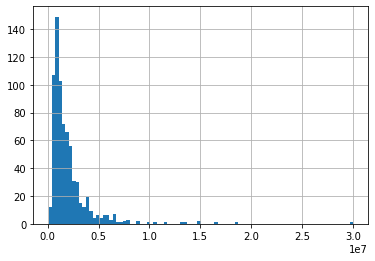

In [11]:
dataset['Price'].hist(bins = 90)


Lets take a look at the distribution of the number of bedrooms and bathrooms, both attributes resembles an exponetial fasmily of distribution 

array([[<AxesSubplot:title={'center':'Bathrooms'}>,
        <AxesSubplot:title={'center':'Bedrooms'}>]], dtype=object)

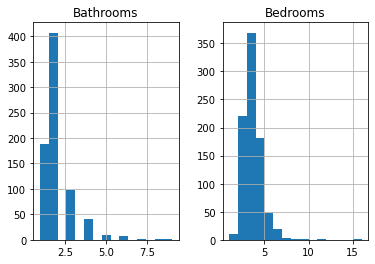

In [12]:
dataset[["Bathrooms","Bedrooms"]].hist(bins = 15)

In [13]:
dataset['Location']

0      lat: 51.5073509,long: -0.1277583
1      lat: 51.5073509,long: -0.1277583
2      lat: 51.5073509,long: -0.1277583
3      lat: 51.5073509,long: -0.1277583
4      lat: 51.5073509,long: -0.1277583
                     ...               
145    lat: 51.5073509,long: -0.1277583
146    lat: 51.5073509,long: -0.1277583
147    lat: 51.5073509,long: -0.1277583
148    lat: 51.5073509,long: -0.1277583
149    lat: 51.5073509,long: -0.1277583
Name: Location, Length: 888, dtype: object

In [14]:
dataset[["noise1", "Lat", "Long"]] = dataset["Location"].str.split(' ', expand = True)


In [15]:
dataset[["Lat","noise0"]] = dataset["Lat"].str.split(',', expand = True)

In [16]:
dataset["Erf Size"] = dataset["Erf Size"].str.replace('m²', '')
dataset["Erf Size"] = dataset["Erf Size"].str.replace(' ', '')


In [17]:
dataset = dataset[["Bathrooms","Bedrooms","Erf Size","Garages","Lat","Long", "Price", "Type of Property", "Listing Date"]]

In [18]:
dataset["Erf Size"] = pd.to_numeric(dataset["Erf Size"] , errors= 'coerce')

In [19]:
median_erf_size = dataset["Erf Size"].median()

dataset['Erf Size'] = dataset['Erf Size'].fillna(median_erf_size)

In [20]:
dataset['Erf Size']

0       242.0
1      1733.0
2       987.0
3      1539.0
4        70.0
        ...  
145    2000.0
146     242.0
147     242.0
148    1016.0
149     995.0
Name: Erf Size, Length: 888, dtype: float64

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bathrooms         888 non-null    float64
 1   Bedrooms          888 non-null    float64
 2   Erf Size          888 non-null    float64
 3   Garages           888 non-null    float64
 4   Lat               888 non-null    float64
 5   Long              888 non-null    float64
 6   Price             888 non-null    float64
 7   Type of Property  888 non-null    object 
 8   Listing Date      888 non-null    object 
dtypes: float64(7), object(2)
memory usage: 69.4+ KB


In [22]:
dataset['Bathrooms'] = dataset['Bathrooms'].fillna(dataset['Bathrooms'].median())
dataset['Bedrooms'] = dataset['Bedrooms'].fillna(dataset['Bedrooms'].median())
dataset['Garages'] = dataset['Garages'].fillna(dataset['Garages'].median())
dataset['Price'] = dataset['Price'].fillna(dataset['Price'].median())


In [39]:

dataset.to_csv('/Users/admin/Projects/housing_prices/dataset.csv', index = False)

### Create a Test Set 

In [24]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

### Visualizing Geographical Data

In [25]:
property_listings = train_set.copy()
property_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 707 to 102
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bathrooms         710 non-null    float64
 1   Bedrooms          710 non-null    float64
 2   Erf Size          710 non-null    float64
 3   Garages           710 non-null    float64
 4   Lat               710 non-null    object 
 5   Long              710 non-null    object 
 6   Price             710 non-null    float64
 7   Type of Property  710 non-null    object 
 8   Listing Date      710 non-null    object 
dtypes: float64(5), object(4)
memory usage: 55.5+ KB


<AxesSubplot:xlabel='Long', ylabel='Lat'>

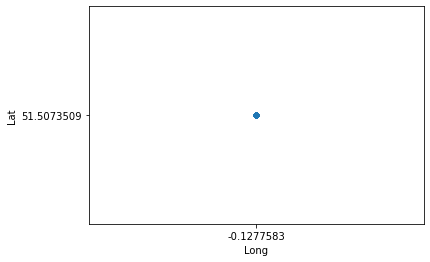

In [26]:
property_listings.plot(kind = 'scatter', x = 'Long', y = 'Lat', alpha = 0.1)

In [27]:
dataset["Lat"] = pd.to_numeric(dataset["Lat"] , errors= 'coerce')
dataset["Long"] = pd.to_numeric(dataset["Long"] , errors= 'coerce')

### Looking for Correlations

In [28]:

corr_matrix = property_listings.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price        1.000000
Bathrooms    0.529835
Garages      0.439806
Bedrooms     0.390797
Erf Size     0.049614
Name: Price, dtype: float64

### Prepare the Data for Machine Learning Algorithms


#### Handling Text and Categorical Attributes

In [29]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [30]:
property_cat = train_set[["Type of Property"]]

In [31]:
property_cat_encoded = ordinal_encoder.fit_transform(property_cat)

In [32]:
property_cat_encoded[:10]

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.]])

In [33]:
ordinal_encoder.categories_

[array(['Apartment / Flat', 'House', 'Townhouse'], dtype=object)]

In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
property_cat_1hot = cat_encoder.fit_transform(property_cat)
property_cat_1hot

<710x3 sparse matrix of type '<class 'numpy.float64'>'
	with 710 stored elements in Compressed Sparse Row format>

In [35]:
property_cat_1hot.toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [36]:
cat_encoder.categories_

[array(['Apartment / Flat', 'House', 'Townhouse'], dtype=object)]

### Transformation Pipelines

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_features.transformers import DataFrameSelector
from sklearn.base import BaseEstimator, TransformerMixin

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])


NameError: name 'CombinedAttributesAdder' is not defined

In [ ]:
from sklearn_features.transformers import DataFrameSelector

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin



In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 149
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Bathrooms         888 non-null    float64
 1   Bedrooms          888 non-null    float64
 2   Erf Size          888 non-null    float64
 3   Garages           888 non-null    float64
 4   Lat               888 non-null    float64
 5   Long              888 non-null    float64
 6   Price             888 non-null    float64
 7   Type of Property  888 non-null    object 
 8   Listing Date      888 non-null    object 
dtypes: float64(7), object(2)
memory usage: 69.4+ KB
